In [101]:
pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   -------------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
import pandas as pd
import json
import random

import os
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime , timedelta
from dateutil.relativedelta import relativedelta
import seaborn as sns


## Flattenning the JSON Data given in dataset.

In [2]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format



#Code to transform the json format columns in table
def json_read(dir_path , nrows=None):
    
    data_frame = dir_path 
    
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     nrows = nrows
                     )
    
    for column in columns: 
        #It will normalize and set the json to a table
        column_as_df = pd.json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df 

In [3]:
# Creating Dataframe using train.csv
#taking the full dataset initially and choose a subset after some transformations.
df = json_read(r"train.csv")

Loaded train.csv. Shape: (903653, 55)


In [4]:
pd.options.display.max_columns = 60
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

In [5]:
#understanding stats of the data
df.describe()


,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [6]:
df.shape

(903653, 55)

In [7]:
df.dtypes

channelGrouping                                      object
date                                                  int64
fullVisitorId                                        object
sessionId                                            object
socialEngagementType                                 object
visitId                                               int64
visitNumber                                           int64
visitStartTime                                        int64
device.browser                                       object
device.browserVersion                                object
device.browserSize                                   object
device.operatingSystem                               object
device.operatingSystemVersion                        object
device.isMobile                                        bool
device.mobileDeviceBranding                          object
device.mobileDeviceModel                             object
device.mobileInputSelector              

In [8]:
def Null_Count(df):
    # this operation gives a dataframe of number of null values corresponding to column name.
    df_null = df.isnull().sum().sort_values(ascending = False).rename("Null").reset_index()
    return df_null


In [9]:
df_null = Null_Count(df)


## Finding Null percentage for major columns

In [10]:
n_rows = df.shape[0]
null_percent = (df_null['Null']*100)/n_rows

df_null = pd.concat([df_null['index'] , df_null['Null'], null_percent],axis = 1 , keys=['Column','Null_rows','Null_percent'])
df_null = df_null[df_null['Null_percent']!=0.00]
print(df_null)

                                          Column  Null_rows  Null_percent
0                     trafficSource.campaignCode     903652     99.999889
1                        trafficSource.adContent     892707     98.788694
2                      totals.transactionRevenue     892138     98.725728
3       trafficSource.adwordsClickInfo.isVideoAd     882193     97.625195
4   trafficSource.adwordsClickInfo.adNetworkType     882193     97.625195
5            trafficSource.adwordsClickInfo.slot     882193     97.625195
6            trafficSource.adwordsClickInfo.page     882193     97.625195
7           trafficSource.adwordsClickInfo.gclId     882092     97.614018
8                     trafficSource.isTrueDirect     629648     69.678073
9                     trafficSource.referralPath     572712     63.377425
10                         trafficSource.keyword     502929     55.655102
11                                totals.bounces     453023     50.132407
12                              totals

In [11]:
#Changing revenue type from object to float
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)

### What do you do about missing data (if any)?
- Adding default value as 0.0 for all nan values in transactionRevenue data variables because the 'No purchase' entries are encoded as NaN values.

In [12]:
df['totals.transactionRevenue'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: totals.transactionRevenue, dtype: float64

In [13]:
# Filling default values for records with null revenue
df['totals.transactionRevenue'].fillna(0.0, inplace=True)

In [14]:
df['totals.transactionRevenue'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: totals.transactionRevenue, dtype: float64

## Checking Revenue generated corresponding to each visitorId

In [15]:
# Resampling the analytical dataset



#resampling the dataset by eliminating "no purchase" visitors
resampled_df = df[df['totals.transactionRevenue']!=0.0].reset_index()

# grouping by on the basis of fullVisitorId and adding up all the purchases .
grouped_df = resampled_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
print(grouped_df.shape , df.shape)

print(f"only {resampled_df.shape[0]} enteries are available out of {df.shape[0]} entries in the dataset with 'no zero purchase' , {grouped_df.shape[0]} are number of visitors who purchased in past .")


(9996, 2) (903653, 55)
only 11515 enteries are available out of 903653 entries in the dataset with 'no zero purchase' , 9996 are number of visitors who purchased in past .


In [16]:
# Calculating mean and max for checking the average values in revenue series
resampled_df['totals.transactionRevenue'].unique().mean() , resampled_df['totals.transactionRevenue'].unique().max()


(234833006.37659416, 23129500000.0)

- It is worth noting that mean value is so much inflated for each transaction which is not possible in ideal cases so we will normalising these values
by dividing by 10^6.

In [17]:
# Dividing all data points by 10^6 in original dataframe.
resampled_df['totals.transactionRevenue'] = resampled_df['totals.transactionRevenue']//(10**6)

In [18]:
resampled_df['totals.transactionRevenue'].unique().mean() , resampled_df['totals.transactionRevenue'].unique().max()

(765.1433370660694, 23129.0)

## Checking No. Of Uniques for each data column

In [19]:
#checking the total unique values for each column in original dataframe
df2 = pd.DataFrame()
df2['Name'] = [col for col in df.columns]
df2['Uniques'] = [df[col].nunique() for col in df.columns]

In [20]:
# Sorting on the basis of unique values 
df2.sort_values(by = 'Uniques')

,Name,Uniques
54,trafficSource.campaignCode,1
33,geoNetwork.longitude,1
34,geoNetwork.networkLocation,1
35,totals.visits,1
38,totals.bounces,1
22,device.screenResolution,1
21,device.screenColors,1
20,device.language,1
19,device.flashVersion,1
18,device.mobileDeviceMarketingName,1


## Removing Constant Columns
### which data columns are most applicable? Which data columns can I eliminate, knowing they won’t solve our problem scenario?
- Removing those columns which contains singular unique value. Their presence does not contribute meaningfully to the analytical process and can be considered redundant. By eliminating these columns, the dataset is streamlined, focusing resources on variables that exhibit variability and are more likely to offer insights during the exploratory phase of data analysis.

In [21]:
# Removing Constant Columns
constant_cols = [row.Name for row in df2.itertuples(index=False) if row.Uniques==1]
print(constant_cols)
#dropping constant_columns from resampled dataframe
resampled_df.drop(constant_cols, axis=1, inplace=True)


['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion', 'device.mobileDeviceBranding', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.language', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'totals.bounces', 'totals.newVisits', 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.isTrueDirect', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.campaignCode']


In [22]:
resampled_df.shape

(11515, 32)

## Checking and calculating outliers 


In [23]:
def calc_outliers(df_train):
    # mean value , standard deviation is calculated
    mean_val , std_val = np.mean(df_train) , np.std(df_train)

    # seting the cut line to both higher and lower values
    # this is the cutoff for the acceptable values for our case , it can vary as per use case.
    threshold = std_val * 3

    # defining in what bracket our data points should lie and outside of this all values are considered an outlier
    lower_threshold = mean_val - threshold
    upper_threshold = mean_val + threshold
    lower_outliers = 0
    upper_outliers = 0
    #store indices of all occuring outliers
    outliers_indices = []
    for idx , point in enumerate(df_train):
        if point < lower_threshold:
            lower_outliers+=1
            outliers_indices.append(idx)
        if point > upper_threshold:
            upper_outliers+=1
            outliers_indices.append(idx)
    print(f"Lower Outliers: {lower_outliers}")
    print(f"Upper Outliers: {upper_outliers}")
    return outliers_indices

In [24]:
#calculating outliers for our resampled dataframe 
outlier_indices = calc_outliers(resampled_df['totals.transactionRevenue'])
print(outlier_indices)
resampled_df_filtered = resampled_df.drop(outlier_indices)
print(f" filtered rows now  : {resampled_df_filtered.shape[0]}")

Lower Outliers: 0
Upper Outliers: 87
[212, 333, 587, 593, 848, 1060, 1101, 1175, 1280, 1623, 1718, 2171, 2656, 2968, 2998, 3202, 3206, 3586, 3763, 3826, 3856, 4585, 4628, 4642, 4719, 4783, 4803, 4843, 4884, 5019, 5227, 5532, 5624, 5729, 5810, 5825, 5826, 6122, 6469, 6554, 6555, 6776, 6779, 6837, 6860, 7018, 7135, 7189, 7242, 7348, 7386, 7709, 7756, 7845, 7892, 8123, 8220, 8242, 8358, 8568, 8723, 8839, 9031, 9103, 9104, 9439, 9596, 9687, 9713, 9878, 9882, 10097, 10217, 10283, 10369, 10480, 10507, 10601, 10653, 10712, 10741, 11105, 11210, 11227, 11335, 11363, 11464]
 filtered rows now  : 11428


### Are there data outliers?
- It is found that there are some outliers found for the target variable "transactionRevenue" .

In [25]:
## Formatting the date in proper format
# df['date'].dtypes
def format_date(input_date):
    parsed_date = pd.to_datetime(str(input_date), format='%Y%m%d')
    return parsed_date

In [26]:
resampled_df['date'] = resampled_df['date'].apply(format_date)

In [27]:
resampled_df['date'].tail()

11510   2017-01-04
11511   2017-01-04
11512   2017-01-04
11513   2017-01-04
11514   2017-01-04
Name: date, dtype: datetime64[ns]

### Taking an example to understand how visitNumber changing
 

In [28]:
# here taking a sample fullvisitorid for checking how many session he have.
df3=df[df['fullVisitorId'] == "27294437909732085"]
df3.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,0.0,(not set),google,organic,(not provided),not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477847,Organic Search,20160810,27294437909732085,27294437909732085_1470838286,Not Socially Engaged,1470838286,1,1470838286,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,btcentralplus.com,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,0.0,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finding the correlation between visitNumber and revenue
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- revenue - Total revenue made during that visit.

In [29]:
df4 = resampled_df[["totals.transactionRevenue" , "date"]].reset_index()
df4.shape

(11515, 3)

In [30]:
df4.head()

,index,totals.transactionRevenue,date
0,0,37.0,2016-09-02
1,1,306.0,2016-09-02
2,2,68.0,2016-09-02
3,3,26.0,2016-09-02
4,4,574.0,2016-09-02


In [31]:
df4 = df4.drop("index" , axis = 1)


In [32]:
df4.head()

,totals.transactionRevenue,date
0,37.0,2016-09-02
1,306.0,2016-09-02
2,68.0,2016-09-02
3,26.0,2016-09-02
4,574.0,2016-09-02


In [33]:
#taking total revenue made per day 
df4 = df4.groupby(by="date",axis=0).sum()
df4.head()

C:\Users\abhishekchauhan01\AppData\Local\Temp\ipykernel_15232\3530418539.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df4 = df4.groupby(by="date",axis=0).sum()


,totals.transactionRevenue
date,
2016-08-01,6094.0
2016-08-02,1352.0
2016-08-04,1173.0
2016-08-05,5569.0
2016-08-06,1887.0


In [34]:
#similarly we will take total sum of visitNumber per day
df5 = resampled_df[["date","visitNumber"]].groupby(by=["date"],axis=0).sum()
df5.head()

C:\Users\abhishekchauhan01\AppData\Local\Temp\ipykernel_15232\1359908318.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df5 = resampled_df[["date","visitNumber"]].groupby(by=["date"],axis=0).sum()


,visitNumber
date,
2016-08-01,159
2016-08-02,52
2016-08-04,58
2016-08-05,140
2016-08-06,43


Merge these two dataframe and perform visualization.

In [35]:
visitNumber_revenue_df = pd.merge(df4,df5,on="date",how="inner")
visitNumber_revenue_df.head()

,totals.transactionRevenue,visitNumber
date,,
2016-08-01,6094.0,159
2016-08-02,1352.0,52
2016-08-04,1173.0,58
2016-08-05,5569.0,140
2016-08-06,1887.0,43


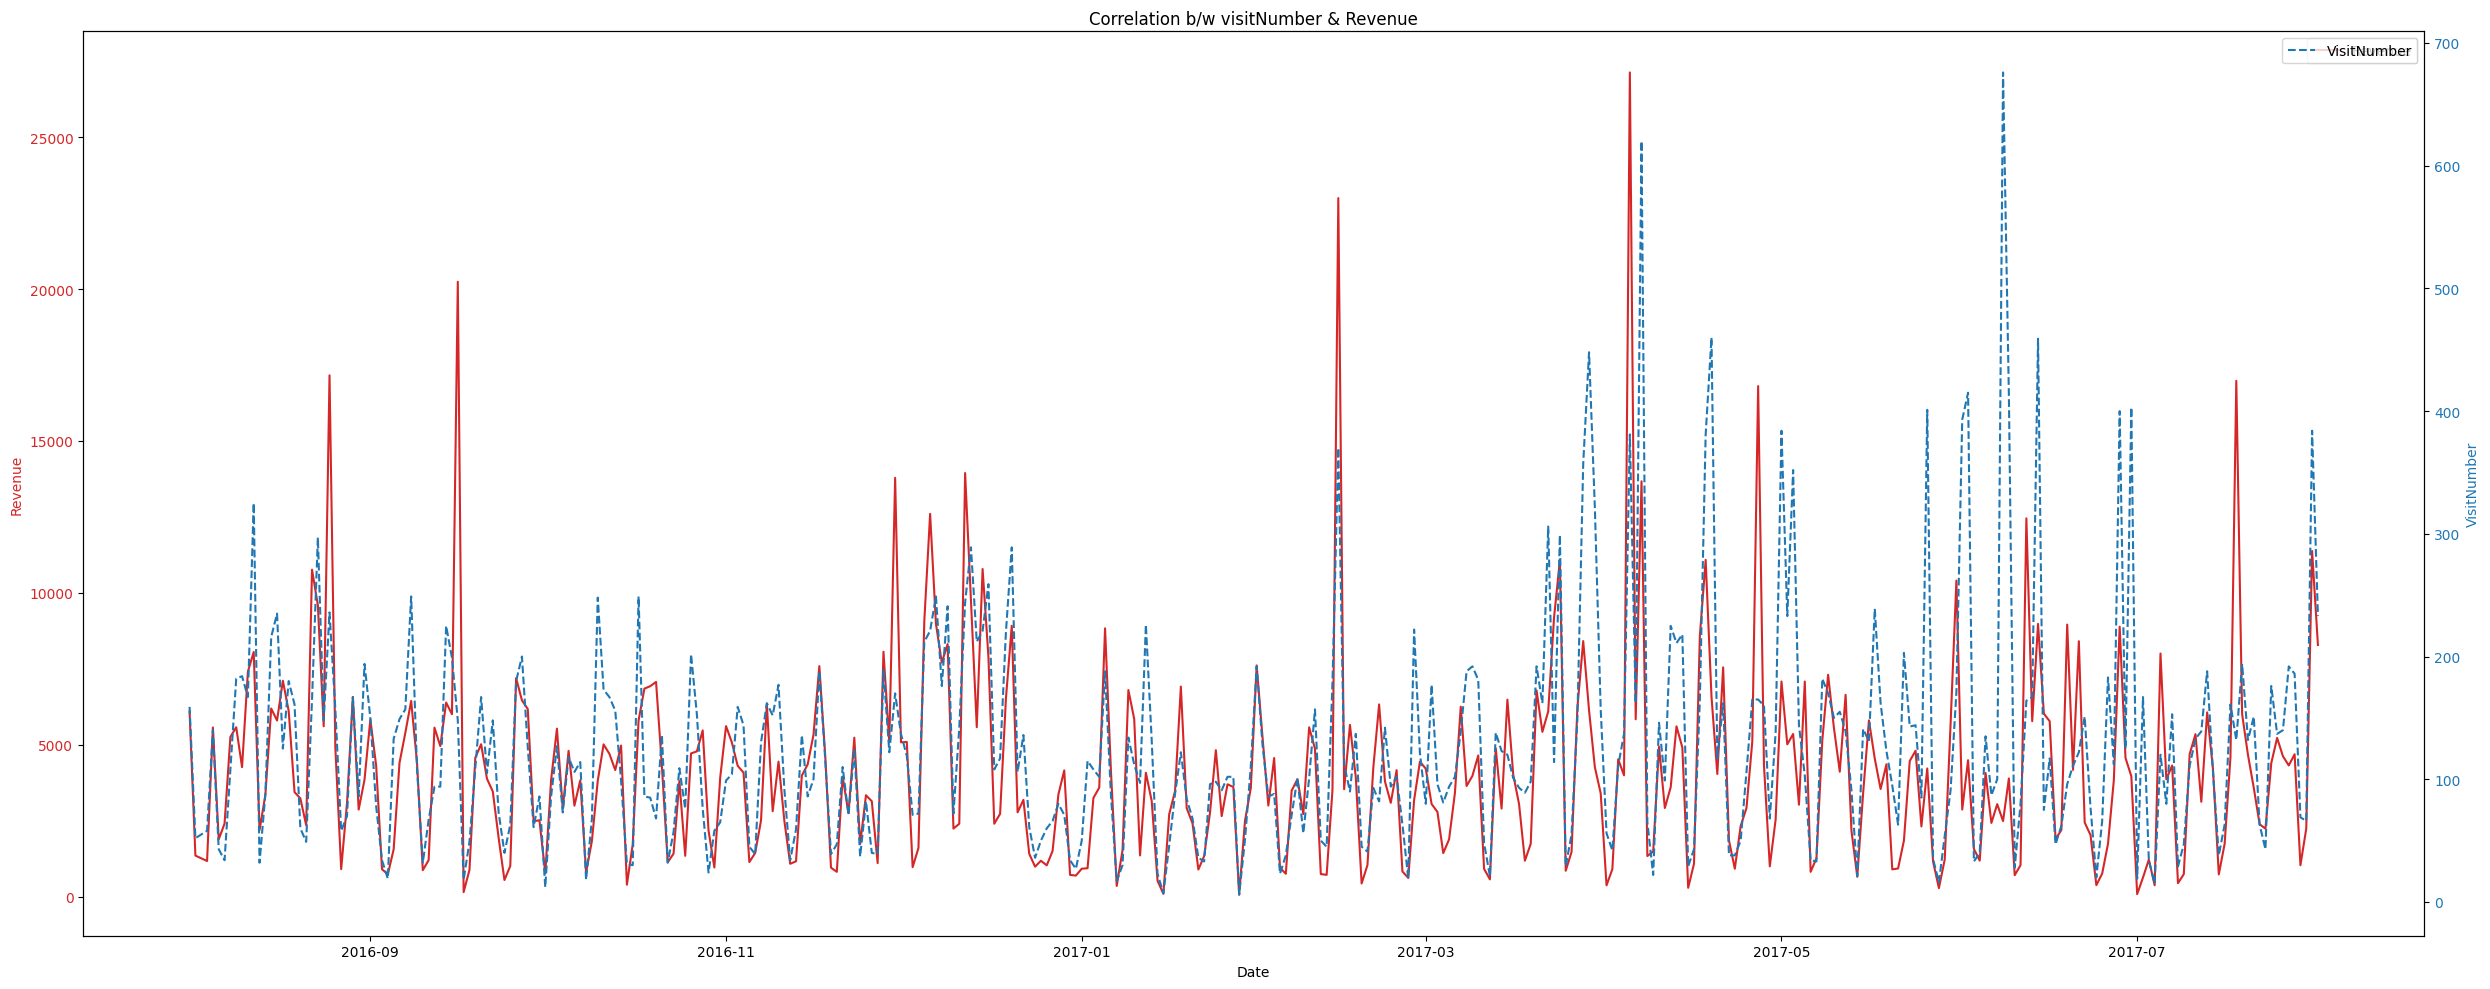

In [36]:
x = visitNumber_revenue_df.index
y1 = visitNumber_revenue_df['totals.transactionRevenue']
y2 = visitNumber_revenue_df['visitNumber']
fig ,ax1  =  plt.subplots(figsize=(25,10))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(labels = ["Revenue"]) # getting overriden

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('VisitNumber', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(labels = ["VisitNumber"])
plt.title("Correlation b/w visitNumber & Revenue")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# show plot
plt.show()

* It is clearly visible that the crest of both graphs are occuring at same time and almost we can see a completely similar behaviour here. 
Which means if we have more number of visitNumber , possiblity of having more revenue is high there.

## Revenue based on the channel groups

In [37]:
channeled_grouped_df = resampled_df[['channelGrouping' , 'totals.transactionRevenue']].groupby('channelGrouping').sum().reset_index()

In [38]:
channeled_grouped_df.tail()

,channelGrouping,totals.transactionRevenue
3,Display,78251.0
4,Organic Search,323854.0
5,Paid Search,43216.0
6,Referral,648456.0
7,Social,4838.0


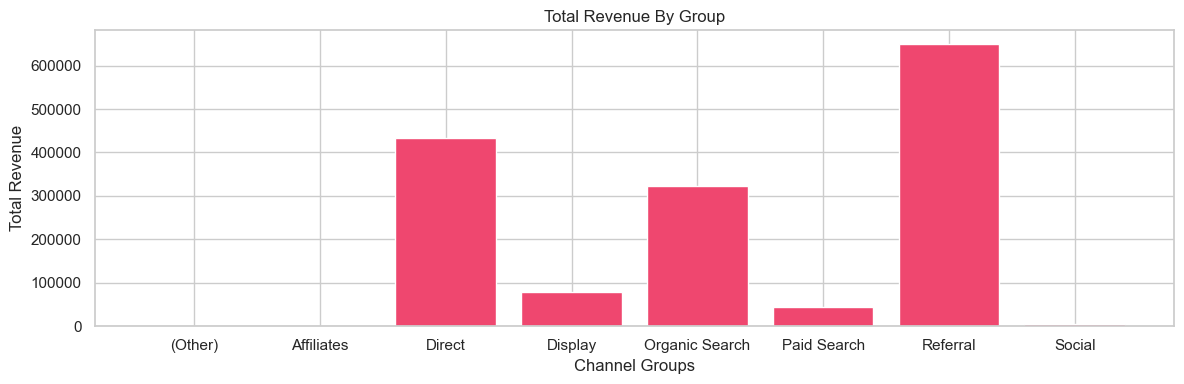

In [137]:
fig , ax1 = plt.subplots(figsize = (12,4))
categories = channeled_grouped_df['channelGrouping']
revenue = channeled_grouped_df['totals.transactionRevenue']


ax1.set_xlabel('Channel Groups')
ax1.set_ylabel('Total Revenue')
ax1.bar(categories, revenue, color='#ef476f')
plt.title('Total Revenue By Group')

# Display the plot
fig.tight_layout()
plt.show()

1. Direct Traffic:
 - Definition: Users who directly type the website URL into the browser or use bookmarks to access the site.
 - Characteristics:
    - No intermediary source or referral link.
    - Represents a direct intent to visit the website.
    - Often includes loyal or returning visitors.
2. Organic Search:
 - Definition: Users who find the website through a search engine's organic (non-paid) search results.
 - Characteristics:
    - Results from the user entering search terms in a search engine (e.g., Google).
    - Depend on search engine algorithms and relevance to the query.
    - Represents users actively seeking information related to the website's content.
3. Referral Traffic:
 - Definition: Users who come to the website by clicking on a link from another website.
 - Characteristics:
    - Involves external links leading to the site.
    - Indicates a recommendation or reference from another online source.
    - Can include social media links, blog posts, or links from partner websites.
4. Display Traffic:
 - Definition: Users who visit the website by clicking on a display ad, such as banner ads or other visual advertisements.
 - Characteristics:
    - Results from online display advertising campaigns.
    - Visual and graphical ads are shown on various websites.
    - Users click on the ad to reach the advertised website.
5. Paid Search (PPC - Pay-Per-Click):
 - Definition: Users who reach the website by clicking on a paid advertisement in a search engine's search results.
 - Characteristics:
    - Involves paid advertising campaigns through platforms like Google Ads.
    - Advertisers bid on keywords, and their ads appear when users search for those keywords.
    - Advertisers pay when users click on their ads.

## Insights & suggestions drawn 
1. ### Referral Channel Performance
   
The fact that the referral channel contributes the most to revenue suggests that partnerships, affiliations, or external referrals are effective. Consider exploring and expanding partnerships with referring websites or entities to further capitalize on this revenue stream.

2. ### Direct Traffic Impact

Direct traffic is the second-highest revenue contributor. This may indicate that users who directly visit the website (e.g., through typing the URL or bookmarks) have a high conversion rate. Enhancing the user experience for direct visitors and implementing targeted campaigns could further boost revenue from this channel.

3. ### Optimizing Organic Search

While organic search is third in terms of revenue, it remains a significant source. Consider focusing on search engine optimization (SEO) strategies to improve the website's visibility in search results. This includes keyword optimization, content quality, and backlink strategies.

## Revenue on the basis of device browser/category

In [40]:
# First we will check what are the number of unique browsers do we have
resampled_df['device.browser'].nunique()


9

In [41]:

device_grouped_df = resampled_df.groupby('device.browser')['totals.transactionRevenue'].sum().reset_index()
device_grouped_visits_df = resampled_df.groupby('device.browser')['totals.transactionRevenue'].count().reset_index()
device_grouped_visits_df = device_grouped_visits_df.rename(columns={'totals.transactionRevenue': 'Count'})
device_grouped_df = device_grouped_df.sort_values(by = 'totals.transactionRevenue' , ascending=True)
device_grouped_visits_df

,device.browser,Count
0,Amazon Silk,1
1,Android Webview,6
2,Chrome,10353
3,Edge,58
4,Firefox,191
5,Internet Explorer,109
6,Opera,5
7,Safari,780
8,Safari (in-app),12


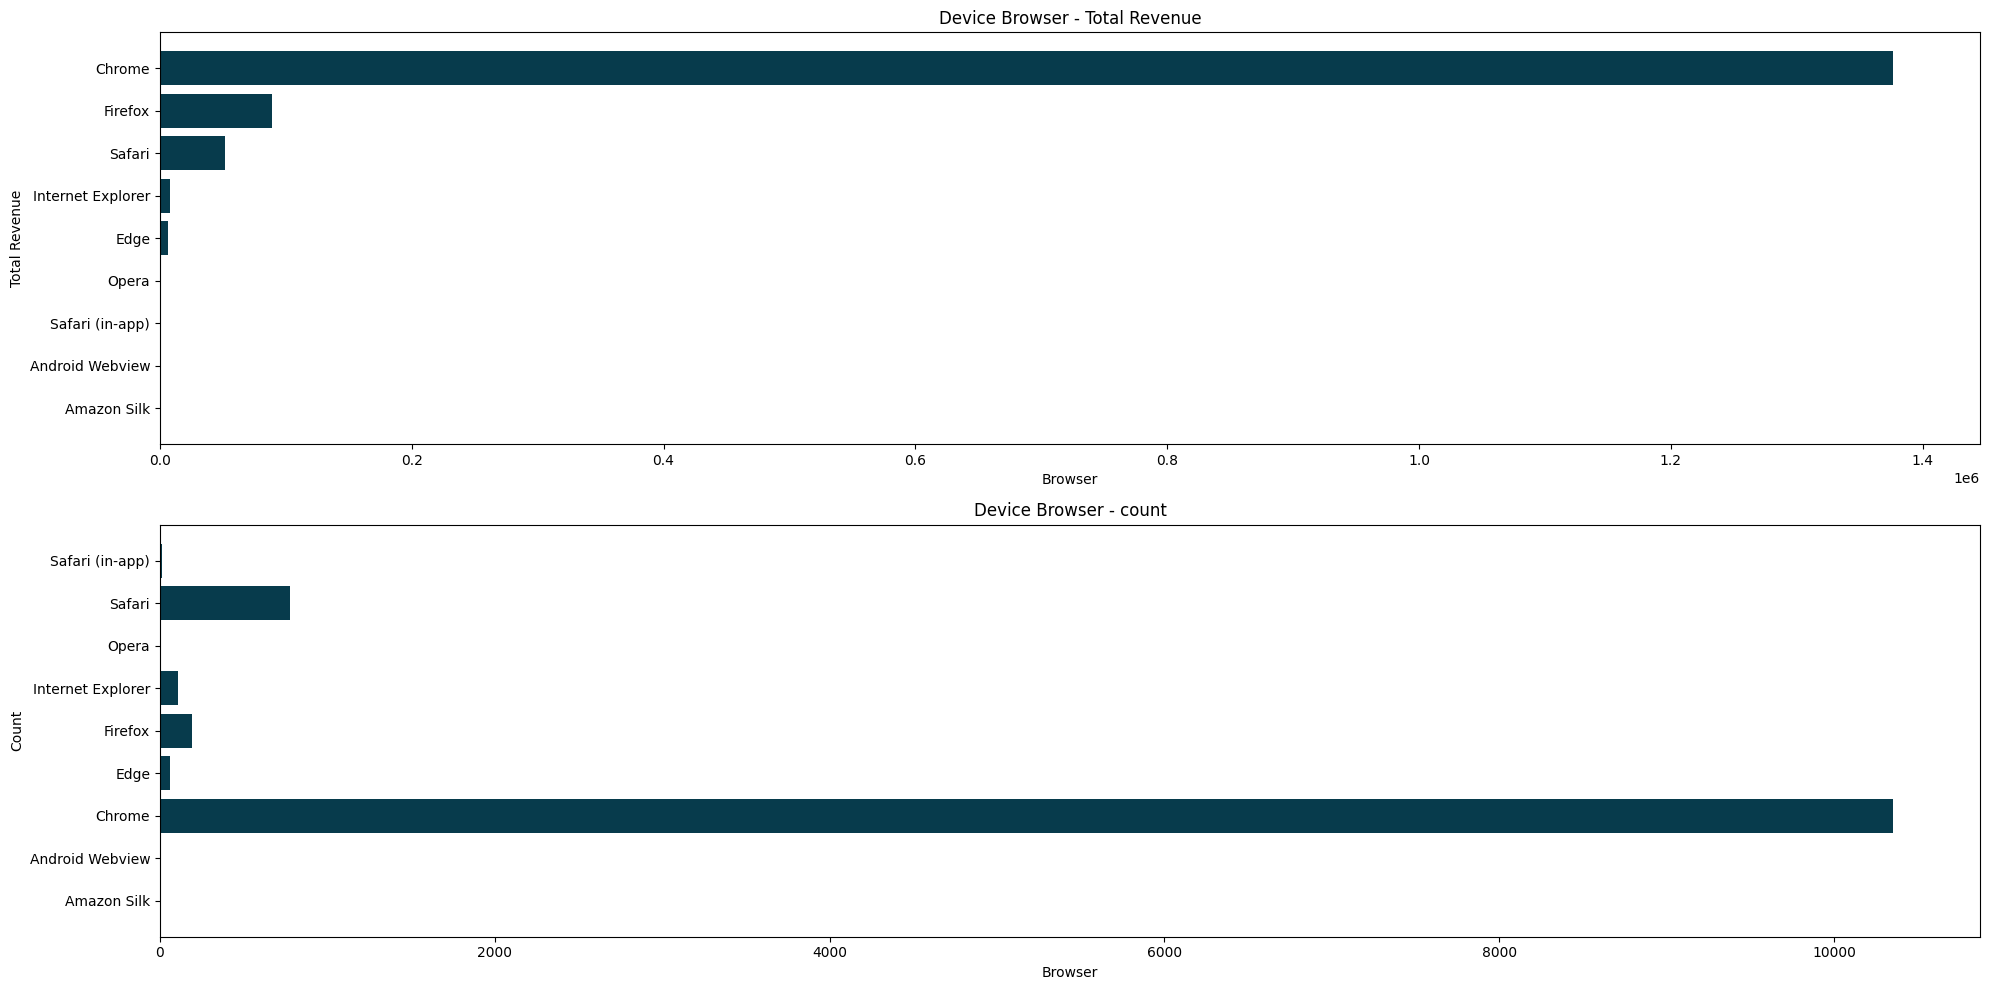

In [42]:
fig , [ax1 , ax2] = plt.subplots(2,1, figsize = (20,10))
Browsers = device_grouped_df['device.browser']
revenue = device_grouped_df['totals.transactionRevenue']


ax1.set_xlabel('Browser')
ax1.set_ylabel('Total Revenue')
ax1.barh(Browsers, revenue, color='#073b4c')
ax1.set_title('Device Browser - Total Revenue')


#using 2nd subplot to plot count
Browsers2 = device_grouped_visits_df['device.browser']
count = device_grouped_visits_df['Count']
ax2.set_xlabel('Browser')
ax2.set_ylabel('Count')
ax2.barh(Browsers2, count, color='#073b4c')
ax2.set_title('Device Browser - count')

# Display the plot
fig.tight_layout()
plt.show()


Clearly, Chrome leads in both visitation and revenue, with Firefox and Safari following, displaying a considerable gap between them.

## Suggestions for improving performance
- Since Chrome is the leading revenue generator, we should ensure that the website is optimized for Chrome compatibility.
- We should prioritize testing and optimization for Chrome users to provide a seamless and satisfying user experience.
- While Chrome may dominate, do not neglect users on Firefox and Safari. Identify and address any issues or discrepancies in the user experience for these browsers.
- Enhance website performance, load times, and compatibility to maximize revenue from Firefox and Safari users.
- Conduct thorough cross-browser testing to ensure that the website functions seamlessly across different browsers.
- Resolve any compatibility issues promptly to avoid revenue loss due to user frustration or abandonment.

## Churn Visualization

Churn rate, also known as customer attrition rate or customer churn, is a business metric that calculates the percentage of customers or subscribers who discontinue their subscription or stop using a service during a given time period. 
Churn rate period can ve verious from day to year corresponding to different cases , here we will visualize monthly churn rate.

In [43]:
sorted_date_data = np.sort(resampled_df['date'].unique())
sorted_date_data

array(['2016-08-01T00:00:00.000000000', '2016-08-02T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-08-06T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-08-08T00:00:00.000000000', '2016-08-09T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-11T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-14T00:00:00.000000000', '2016-08-15T00:00:00.000000000',
       '2016-08-16T00:00:00.000000000', '2016-08-17T00:00:00.000000000',
       '2016-08-18T00:00:00.000000000', '2016-08-19T00:00:00.000000000',
       '2016-08-20T00:00:00.000000000', '2016-08-21T00:00:00.000000000',
       '2016-08-22T00:00:00.000000000', '2016-08-23T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-25T00:00:00.000000000',
       '2016-08-26T00:00:00.000000000', '2016-08-27T00:00:00.000000000',
       '2016-08-28T00:00:00.000000000', '2016-08-29

we can see that the data is given between 08-2016 to 07-2017 so we will take this period of time for churn rate calculation.
we will take all months between this period( inclusive).


In [44]:
start_date = datetime(2016, 8, 1)
end_date = datetime(2017, 7, 31)

current_date = start_date
months_given_list = []
while current_date <= end_date:
    month_year = (current_date.strftime("%Y"),current_date.strftime("%m"))
    months_given_list.append(month_year)
    current_date +=relativedelta(months=1)
months_given_list.sort(key = lambda x: x[0])
print(months_given_list)

[('2016', '08'), ('2016', '09'), ('2016', '10'), ('2016', '11'), ('2016', '12'), ('2017', '01'), ('2017', '02'), ('2017', '03'), ('2017', '04'), ('2017', '05'), ('2017', '06'), ('2017', '07')]


In [45]:
# we will create a dataframe to collect information of visitors who visited website in organized manner
dated_df = resampled_df[['date','fullVisitorId']]
dated_df.head()

,date,fullVisitorId
0,2016-09-02,6194193421514403509
1,2016-09-02,5327166854580374902
2,2016-09-02,8885051388942907862
3,2016-09-02,0185467632009737931
4,2016-09-02,3244885836845029978


In [46]:
def get_month(input_date):
    curr_month = input_date.strftime("%m")
    return curr_month 
def get_year(input_date):
    curr_year = input_date.strftime("%Y")
    return curr_year

In [47]:
dated_df["month"]  = resampled_df["date"].apply(get_month)
dated_df["year"] = resampled_df["date"].apply(get_year)

C:\Users\abhishekchauhan01\AppData\Local\Temp\ipykernel_15232\3352249722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dated_df["month"]  = resampled_df["date"].apply(get_month)
C:\Users\abhishekchauhan01\AppData\Local\Temp\ipykernel_15232\3352249722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dated_df["year"] = resampled_df["date"].apply(get_year)


In [48]:
dated_df.head()

,date,fullVisitorId,month,year
0,2016-09-02,6194193421514403509,09,2016
1,2016-09-02,5327166854580374902,09,2016
2,2016-09-02,8885051388942907862,09,2016
3,2016-09-02,0185467632009737931,09,2016
4,2016-09-02,3244885836845029978,09,2016


In [49]:
#taking an example later we will apply this on all intervals
#we can get records for this particular day and month
temp_df = dated_df[(dated_df['year'] == "2016") & (dated_df['month'] == "09")]
temp_df.head() , temp_df.shape

(        date        fullVisitorId month  year
 0 2016-09-02  6194193421514403509    09  2016
 1 2016-09-02  5327166854580374902    09  2016
 2 2016-09-02  8885051388942907862    09  2016
 3 2016-09-02  0185467632009737931    09  2016
 4 2016-09-02  3244885836845029978    09  2016,
 (859, 4))

In [50]:
# but here is a problem of repeating visitors who are coming in same month more than once so we want to consider a visitorId once only in a 
# particular month.
unique_visitors_for_month = set(temp_df["fullVisitorId"])
len(unique_visitors_for_month)

787

We can see that doing above operation reduced our records 

By generalizing the above solution we have:

In [51]:
intervals_visitors = []
for tmp_tuple in months_given_list:
    intervals_visitors.append(set(dated_df[(dated_df.year == tmp_tuple[0]) & (dated_df.month == tmp_tuple[1]) ]["fullVisitorId"]))
    
f"Size of intervals_visitors:{len(intervals_visitors)} "

'Size of intervals_visitors:12 '

In [52]:
#this will verify that our generalized solution giving correct results
print(len(intervals_visitors[1]))

787


Now intervals_visitors contains all unique visitors who visited the website on corresponding time interval.

## matrix calculation for filling the churn-rate matrix

In [53]:
#taking zero matrix of 12X12 size
churn_matrix = np.zeros((12,12))

for i in range(0,12):
    churn_set = intervals_visitors[i]
    #Adding diagonal values as length
    churn_matrix[i][i] = len(churn_set)
    for j in range(i+1,12): 
        #taking intersection of current churn_set and next interval visitors ids.
        churn_set = churn_set & intervals_visitors[j]
        #updating the value in churn matrix
        churn_matrix[i][j] = len(churn_set)

In [54]:
# data = [
#     [1, 2, 3, 4],
#     [5, 6, 7, 8],
#     [9, 10, 11, 12]
# ]
# df_example = pd.DataFrame(data, columns=['A', 'B', 'C', 'D'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(df_example, annot=True, cmap='viridis', fmt='.1f', linewidths=.5, cbar_kws={'label': 'Values'})
# plt.title('Heatmap Example')
# plt.show()

Text(117.24999999999999, 0.5, 'months')

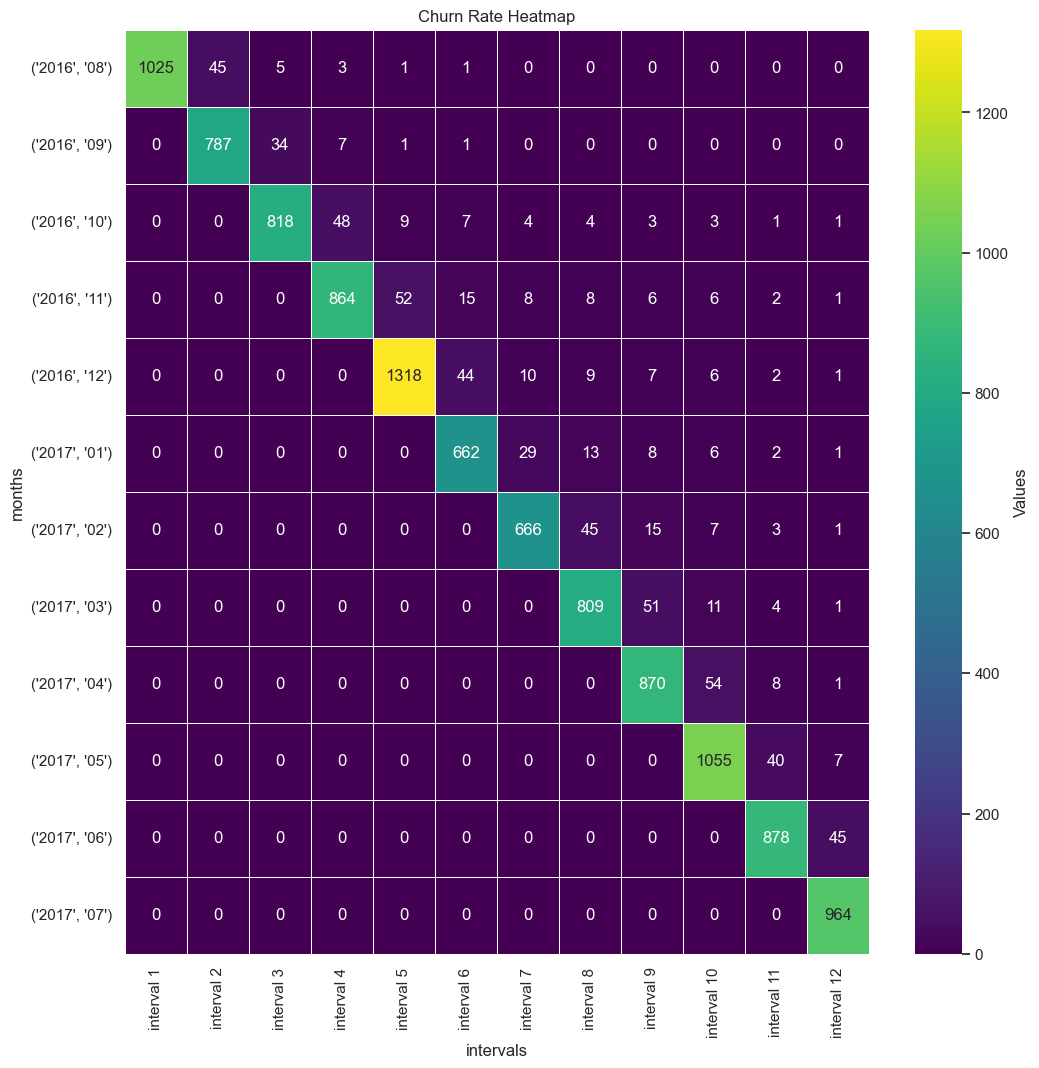

In [139]:
x_tick_labels = [f"interval {t}" for t in range(1,13)]
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(np.array(churn_matrix,dtype=int), annot=True, cmap='viridis', xticklabels= x_tick_labels ,yticklabels=months_given_list, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Values'})
ax.set_title('Churn Rate Heatmap')
ax.set_xlabel("intervals")
ax.set_ylabel("months")



Customer Lifetime Value (CLV or LTV) is a key metric that represents the total revenue a business can reasonably expect to earn from a customer throughout their entire relationship. It is a forward-looking metric that takes into account not just the initial transaction but also the expected future transactions over the customer's lifetime as a patron of the business.


Usually we use following formula to calculate CLV. 

                                                                CLV= ARPU / ChurnRate
ARPU - Average Revenue Per User

In [57]:
## Top Countries by revenue / visits

In [72]:
resampled_df.loc[:,'geoNetwork.country'].nunique()


69

In [64]:
# since there are almost 69 countries we will choose top 8 countries which are responsible for the maximum revenue generation and maximum visits.

In [113]:
country_visits_df = resampled_df.loc[:,'geoNetwork.country'].value_counts()[:8].reset_index()
#since value counts by default give results in decreasing order we took top 8 rows
country_visits_df['percentage'] = (country_visits_df['count'] / country_visits_df['count'].sum()) * 100
country_visits_df

,geoNetwork.country,count,percentage
0,United States,10953,97.006465
1,Canada,190,1.682756
2,Venezuela,63,0.557967
3,Mexico,20,0.177132
4,Taiwan,19,0.168276
5,Japan,17,0.150562
6,United Kingdom,16,0.141706
7,Australia,13,0.115136


In [86]:
#it is visible that most of the visits are coming from united states

In [129]:
#using this command we are totaling the revenue generated from each country and sorting the results in decreasing order by revenue and taking top 8 countries.

country_revenue_df = resampled_df.groupby('geoNetwork.country')["totals.transactionRevenue"].sum().reset_index().sort_values(by='totals.transactionRevenue',ascending=False)[:8]

In [130]:
#We can see again united states leading in terms of revenue also.
country_revenue_df = country_revenue_df.rename(columns={'totals.transactionRevenue': 'count'})
country_revenue_df['percentage'] = (country_revenue_df['count'] / country_revenue_df['count'].sum()) * 100

In [131]:
country_revenue_df

,geoNetwork.country,count,percentage
66,United States,1445472.0,95.693288
7,Canada,32690.0,2.164147
68,Venezuela,13338.0,0.883004
32,Japan,6716.0,0.444613
34,Kenya,5267.0,0.348686
42,Nigeria,3302.0,0.218599
60,Taiwan,1908.0,0.126314
28,Indonesia,1833.0,0.121348


In [132]:
def pie_chart(df_curr , title):
    # Create a pie chart
    sizes = df_curr['count']
    labels = df_curr['geoNetwork.country']
    percents = df_curr['percentage']
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=None, autopct='', startangle=90)
    plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that labels are outside the pie
    plt.text(1.15, 0.5, '\n'.join([f'{label}: {round(percent,2)}%' for label, percent in zip(labels, percents)]),
             horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    plt.legend(labels, title='Country', loc='lower right')
    plt.title(title)
    plt.show()

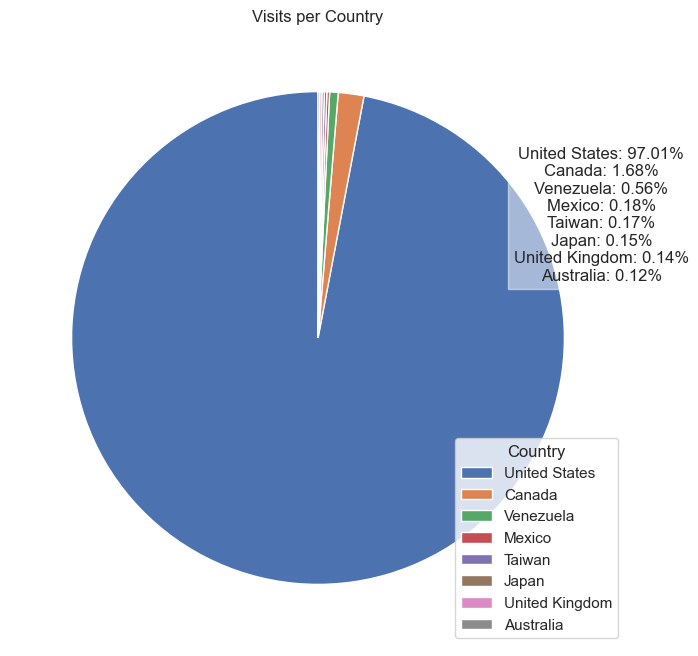

In [133]:
pie_chart(country_visits_df, "Visits per Country")


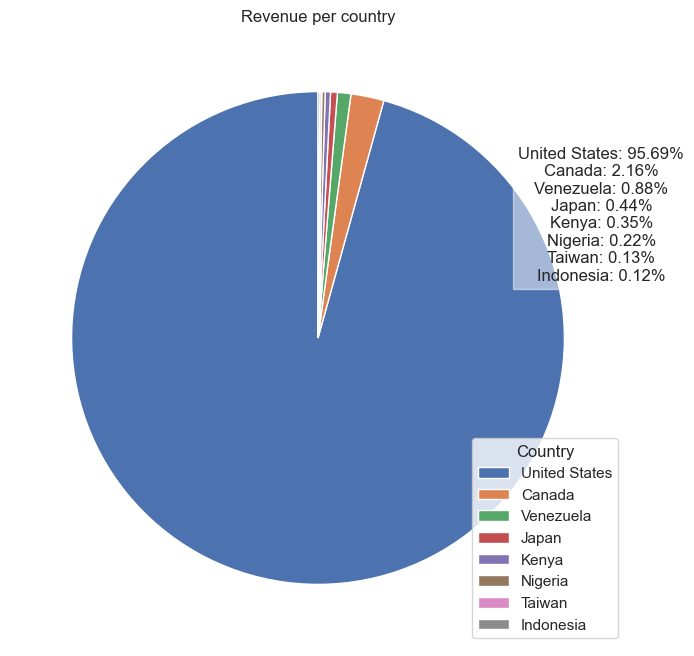

In [135]:
pie_chart(country_revenue_df , "Revenue per country")
